# Qiskit Test for FYP

In [1]:
import numpy as np
from qiskit import *
%matplotlib inline

In [2]:
circuit = QuantumCircuit(3)

In [3]:
# Apply hadamard gate on quibit 0
circuit.h(0)
# Apply CNOT gate on qubit 0 and qubit 1
circuit.cx(0, 1)
# Apply CNOT gate on qubit 0 and qubit 2
circuit.cx(1, 2)

In [4]:
circuit.draw()

In [5]:
#Aer
backend = qiskit.Aer.get_backend('statevector_simulator')

In [6]:
job = execute(circuit, backend)
result = job.result()

In [7]:
outputstates = result.get_statevector(circuit, decimals=10)
print(outputstates)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


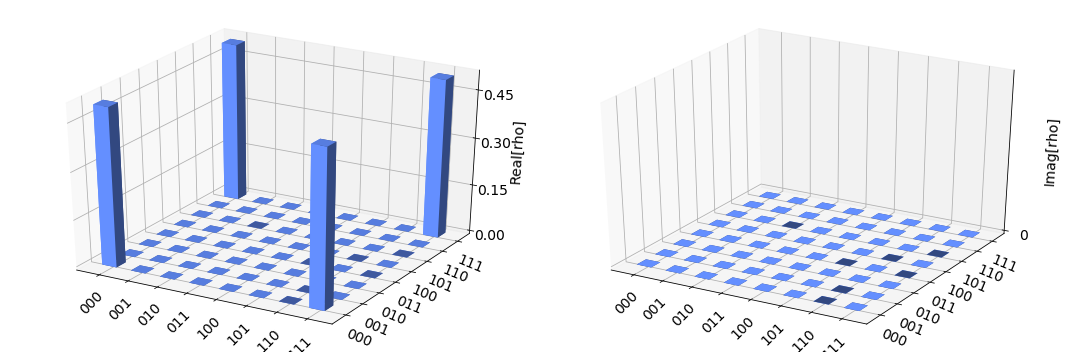

In [8]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstates)

In [9]:
# Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job = execute(circuit, backend)
result = job.result()

# Show the results
print(result.get_unitary(circuit, decimals=3))

[[ 0.707+0.j  0.707+0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j  0.707+0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j  0.707+0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j -0.707+0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j  0.707+0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]]


In [10]:
# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3),range(3))

# The Qiskit circuit object supports composition using
# the addition operator.
qc = circuit+meas

#drawing the circuit
qc.draw()

In [11]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()


In [12]:
counts = result_sim.get_counts(qc)
print(counts)

{'000': 476, '111': 548}


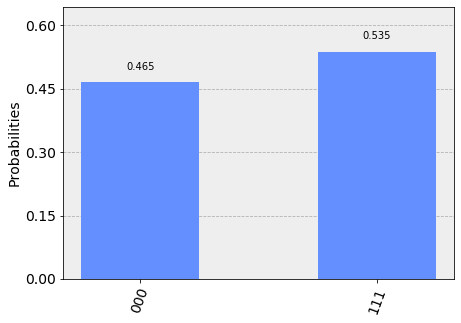

In [13]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)